In [37]:
## Import các thư viện cần thiết
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [38]:
## Đọc dữ liệu đầu vào từ csv
with open('../Lab2/Data/groceries.csv') as f:
    df = pd.read_csv(f)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       9835 non-null   object
 1   B       7676 non-null   object
 2   C       6033 non-null   object
 3   D       4734 non-null   object
 4   E       3729 non-null   object
 5   F       2874 non-null   object
 6   G       2229 non-null   object
 7   H       1684 non-null   object
 8   I       1246 non-null   object
 9   K       896 non-null    object
 10  L       650 non-null    object
 11  M       468 non-null    object
 12  N       351 non-null    object
 13  O       273 non-null    object
 14  P       196 non-null    object
 15  Q       141 non-null    object
 16  R       95 non-null     object
 17  S       66 non-null     object
 18  T       52 non-null     object
 19  U       38 non-null     object
 20  V       29 non-null     object
 21  W       18 non-null     object
 22  X       14 non-null     

In [40]:
df.head()

,A,B,C,D,E,F,G,H,I,K,...,X,Y,Z,a,b,c,d,e,f,g
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dataset = df.to_numpy()

In [42]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_df = te.fit(dataset.astype(str)).transform(dataset.astype(str))
te_df

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [44]:
basket = pd.DataFrame(te_df, columns=te.columns_)

In [45]:
basket.head(12)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [46]:
import time

In [47]:
times1 = []
min_supports = []
for i in range (1,11):
    start = time.time()
    itemsets = apriori(basket,min_support=0.01*i, use_colnames=True)
    rules = association_rules(itemsets, min_threshold=0.1)
    end = time.time()
    min_supports.append(0.01*i)
    times1.append((end-start)*10**3)
    itemsets.head(12)

In [53]:
itemsets.head(12)

,support,itemsets
0,0.999898,(nan)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.110524,(bottled water)
7,0.174377,(soda)
8,0.108998,(root vegetables)
9,0.139400,"(nan, yogurt)"


In [48]:
from mlxtend.frequent_patterns import fpgrowth

In [49]:
times2 = []
for i in range (1,11):
    start = time.time()
    itemsets = fpgrowth(basket,min_support=0.01*i, use_colnames=True)
    rules = association_rules(itemsets, min_threshold=0.1)
    end = time.time()
    items2.append(0.01*i)
    times2.append((end-start)*10**3)
    itemsets.head(12)

In [54]:
itemsets.head(12)

,support,itemsets
0,0.999898,(nan)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.110524,(bottled water)
7,0.174377,(soda)
8,0.108998,(root vegetables)
9,0.139400,"(nan, yogurt)"


In [51]:
data_preproc = pd.DataFrame({
    'Min_Support': min_supports, 
    'Apriori': times1,
    'Fpgrowth': times2})

<Axes: xlabel='Min_Support', ylabel='value'>

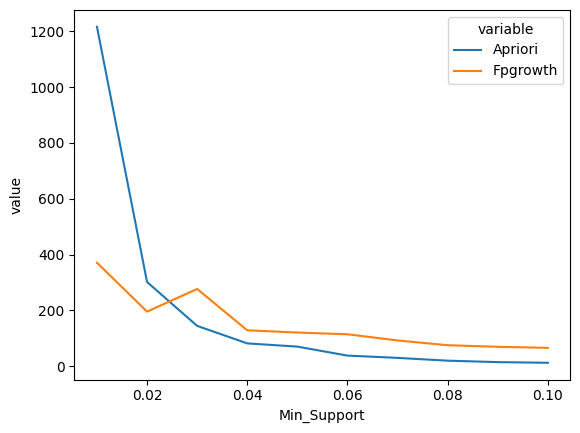

In [52]:
sns.lineplot(x='Min_Support', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Min_Support']))

Đánh giá: Với min_support < 0.03 thì giải thuật Fpgrowth chiếm ưu thế hơn về mặt thời gian, tuy nhiên min_support > 0.03 và tiến gần về 0.1 thì thời gian 2 bên tuy có sự chệnh lệch không đáng kể nhưng với giải thuật Apriori thời gian vẫn nhanh hơn Fpgrowth